In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import os
import sys

In [2]:
def plot_conf_mat(mat, labels, nb_elements, normalize=False, title=None, caption=None):
    if normalize:
        mat = [[mat[i][j] / nb_elements[i] for j in range(len(mat[i]))] for i in range(len(mat))]

    fig, ax = plt.subplots(figsize=(10, 8))
    cax = ax.matshow(mat, cmap='viridis')
    #fig.colorbar(cax)

    mat = np.array(mat)
    # Add numbers to each cell
    for i in range(mat.shape[0]):
        for j in range(mat.shape[1]):
            value = mat[i, j]
            color = "black" if value > mat.max() / 2 else "yellow"
            if len(labels)< 10:
                ax.text(j, i, format(value, ".3f"), ha="center", va="center", color=color, fontsize=8)
            elif(i==j):
                ax.text(j, i, format(value, ".3f"), ha="center", va="center", color=color, fontsize=8)


    ax.set_xticks(range(len(mat)))
    ax.set_yticks(range(len(mat)))

    ax.set_xticklabels(labels, rotation=45, ha='center')
    ax.set_yticklabels(labels)

    plt.xlabel('Predicted', fontsize=14)
    plt.ylabel('True Label', fontsize=14)
    if title:
        plt.title(title, fontsize=14)
    if caption:
        fig.text(0.5, -0.05, caption, ha='center', fontsize=14)
    
    plt.tight_layout()
    plt.show()


c_FN, c_FP, c_TP:  19 10 1405
Accuracy for 8-class model: 0.9152
Precision for cough class: 0.9929
Recall (sensitivity) for cough class: 0.9867
F1 score for cough class: 0.9898


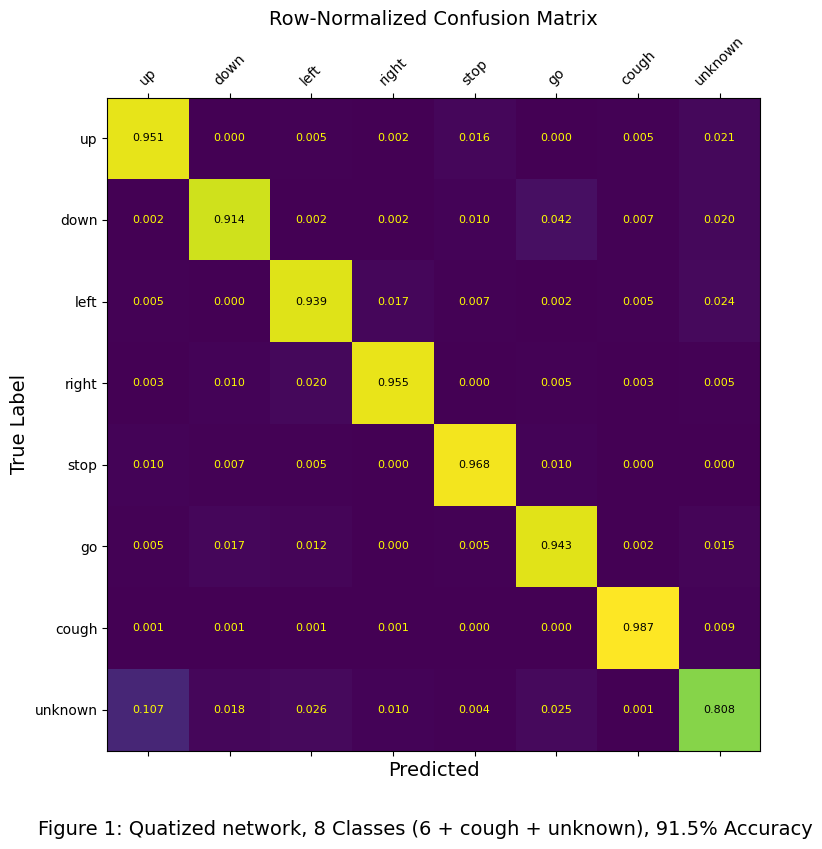

In [4]:
# Actual x Predicted
conf_mat_kws_c8 = [
    [404, 0, 2, 1, 7, 0, 2, 9],
    [1, 371, 1, 1, 4, 17, 3, 8],
    [2, 0, 387, 7, 3, 1, 2, 10],
    [1, 4, 8, 378, 0, 2, 1, 2],
    [4, 3, 2, 0, 398, 4, 0, 0],
    [2, 7, 5, 0, 2, 379, 1, 6],
    [2, 1, 2, 1, 0, 0, 1405, 13],
    [174, 30, 42, 17, 7, 41, 1, 1310]
]

c8_total = [425, 406, 412, 396, 411, 402, 1424, 1622]
c8_labels = ['up', 'down', 'left', 'right', 'stop', 'go', 'cough', 'unknown']

# caracterising cough class
c_TP = conf_mat_kws_c8[-2][-2]
c_FN = sum(conf_mat_kws_c8[-2]) - c_TP
c_FP = sum(conf_mat_kws_c8[i][-2] for i in range(len(conf_mat_kws_c8))) - c_TP # sum of column except cough

print('c_FN, c_FP, c_TP: ', c_FN, c_FP, c_TP)
precision_1 = c_TP / (c_TP + c_FP)
recall_1 = c_TP / (c_TP + c_FN)
F1_1 = 2* c_TP / (2 * c_TP + c_FN + c_FP)
accuracy_1 = sum(conf_mat_kws_c8[i][i] for i in range(len(conf_mat_kws_c8))) / sum(c8_total)
print(f"Accuracy for 8-class model: {accuracy_1:.4f}")
print(f"Precision for cough class: {precision_1:.4f}")
print(f"Recall (sensitivity) for cough class: {recall_1:.4f}")
print(f"F1 score for cough class: {F1_1:.4f}")

#plot confusion matrix 
plot_conf_mat(conf_mat_kws_c8, c8_labels, c8_total, normalize=True,
              title='Row-Normalized Confusion Matrix',
              caption="Figure 1: Quatized network, 8 Classes (6 + cough + unknown), 91.5% Accuracy")

c_FN, c_FP, c_TP:  20 26 1404
Accuracy for 20-class model: 0.8788
Precision for cough class: 0.9818
Recall (sensitivity) for cough class: 0.9860
F1 score for cough class: 0.9839


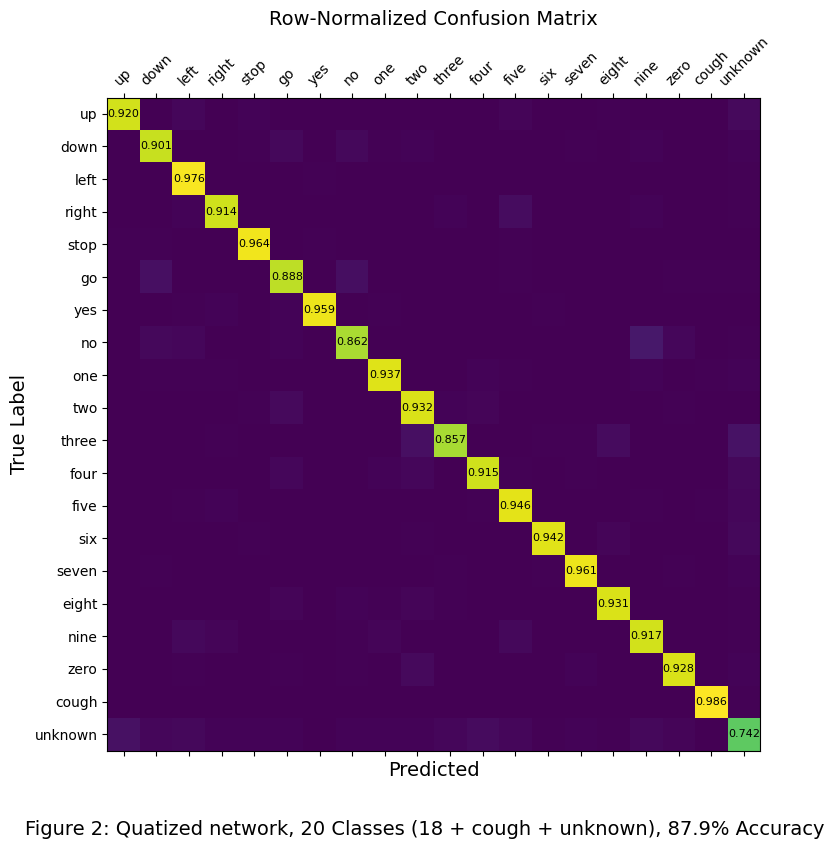

In [5]:
conf_mat_kws_c20 = [
    [391, 1, 8, 0, 4, 0, 0, 0, 0, 1, 0, 1, 5, 1, 1, 2, 0, 0, 0, 10],
    [0, 366, 0, 0, 3, 9, 0, 8, 2, 4, 0, 1, 1, 0, 2, 0, 4, 1, 1, 4],
    [0, 0, 402, 1, 1, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 2],
    [0, 0, 4, 362, 1, 0, 0, 0, 0, 0, 4, 1, 13, 0, 1, 1, 4, 1, 1, 3],
    [3, 2, 1, 0, 396, 1, 2, 0, 0, 1, 1, 0, 3, 0, 1, 0, 0, 0, 0, 0],
    [0, 16, 1, 0, 1, 357, 0, 15, 0, 1, 1, 1, 2, 0, 0, 0, 0, 3, 2, 2],
    [0, 0, 3, 4, 0, 4, 402, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1],
    [0, 8, 7, 1, 0, 4, 0, 349, 0, 0, 0, 1, 0, 0, 0, 1, 25, 7, 0, 2],
    [1, 2, 3, 2, 0, 0, 0, 0, 374, 1, 0, 4, 2, 0, 0, 0, 4, 0, 2, 4],
    [0, 0, 0, 0, 3, 10, 0, 0, 1, 395, 4, 5, 0, 1, 0, 1, 0, 2, 1, 1],
    [0, 0, 0, 3, 1, 0, 0, 0, 0, 16, 347, 0, 1, 2, 3, 11, 1, 0, 0, 20],
    [0, 0, 0, 0, 0, 7, 0, 0, 4, 7, 0, 366, 2, 0, 2, 1, 1, 1, 0, 9],
    [0, 0, 3, 4, 1, 0, 0, 1, 0, 0, 1, 2, 421, 0, 0, 0, 3, 0, 2, 7],
    [0, 0, 1, 0, 2, 1, 1, 0, 0, 2, 1, 0, 0, 371, 0, 6, 0, 0, 1, 8],
    [0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 3, 390, 0, 0, 3, 0, 4],
    [0, 1, 0, 0, 0, 6, 1, 4, 2, 6, 3, 1, 0, 0, 0, 380, 0, 1, 0, 3],
    [0, 0, 8, 5, 0, 1, 0, 3, 5, 0, 0, 0, 9, 0, 0, 0, 374, 0, 1, 2],
    [0, 1, 2, 1, 0, 2, 0, 2, 0, 11, 0, 1, 0, 0, 4, 0, 1, 388, 1, 4],
    [1, 2, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1404, 10],
    [161, 57, 73, 32, 35, 36, 6, 28, 32, 39, 59, 109, 59, 18, 29, 24, 72, 52, 13, 2688]
]

c20_total = [425, 406, 412, 396, 411, 402, 419, 405, 399, 424, 405, 400, 445, 394, 406, 408, 408, 418, 1424, 3622]
c20_labels = ['up', 'down', 'left', 'right', 'stop', 'go', 'yes', 'no', # 18 + cough + unknown
                  'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'zero',
                  'cough', 'unknown']

# caracterising cough class
c_TP = conf_mat_kws_c20[-2][-2]
c_FN = sum(conf_mat_kws_c20[-2]) - c_TP
c_FP = sum(conf_mat_kws_c20[i][-2] for i in range(len(conf_mat_kws_c20))) - c_TP # sum of column except cough
print('c_FN, c_FP, c_TP: ', c_FN, c_FP, c_TP)
precision_2 = c_TP / (c_TP + c_FP)
recall_2 = c_TP / (c_TP + c_FN)
F1_2 = 2* c_TP / (2 * c_TP + c_FN + c_FP)
accuracy_2 = sum(conf_mat_kws_c20[i][i] for i in range(len(conf_mat_kws_c20))) / sum(c20_total)
print(f"Accuracy for 20-class model: {accuracy_2:.4f}")
print(f"Precision for cough class: {precision_2:.4f}")
print(f"Recall (sensitivity) for cough class: {recall_2:.4f}")
print(f"F1 score for cough class: {F1_2:.4f}")

# plot confusion matrix
plot_conf_mat(conf_mat_kws_c20, c20_labels, c20_total, True, "Row-Normalized Confusion Matrix", "Figure 2: Quatized network, 20 Classes (18 + cough + unknown), 87.9% Accuracy")    


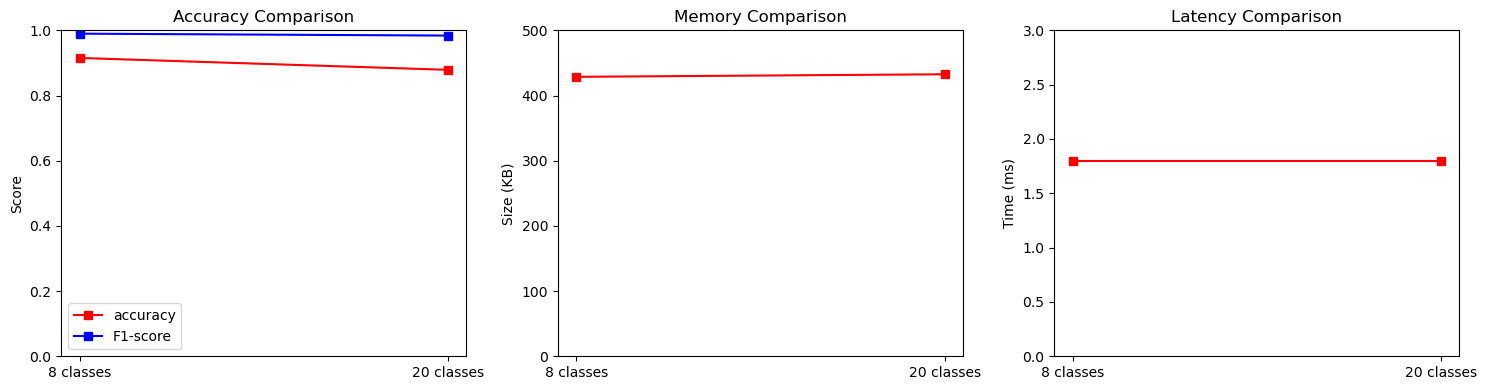

In [27]:
# Comaprison 8 vs 20 classes
metrics = ['8 classes', '20 classes']
accuracy = [accuracy_1, accuracy_2]  
#sensitivity = [recall_1, recall_2]
#precision = [precision_1, precision_2]
F1_score = [F1_1, F1_2]
memory = [428.7, 432.6]
latency = [1.8, 1.8] 

fig, axs = plt.subplots(1, 3, figsize=(15, 4))  # 1 row, 3 columns

# Plotting
axs[0].plot(metrics, accuracy, marker='s', label='accuracy', linestyle='-', color='red')
axs[0].plot(metrics, F1_score, marker='s', label='F1-score', linestyle='-', color='blue')
axs[0].set_ylim(0, 1)
axs[0].legend()
axs[0].set_ylabel('Score')
axs[0].set_title('Accuracy Comparison')


axs[1].plot(metrics, memory, marker='s', label='memory (KB)', linestyle='-', color='red')
axs[1].set_ylim(0, 500)
axs[1].set_ylabel('Size (KB)')
axs[1].set_title('Memory Comparison')


axs[2].plot(metrics, latency, marker='s', label='latency (ms)', linestyle='-', color='red')
axs[2].set_ylim(0, 3)
axs[2].set_ylabel('Time (ms)')
axs[2].set_title('Latency Comparison')


plt.tight_layout()

# Show the plot
plt.show()

c_FN, c_FP, c_TP:  21 51 1403
Accuracy for 20-class model: 0.8818
Precision for cough class: 0.9649
Recall (sensitivity) for cough class: 0.9853
F1 score for cough class: 0.9750


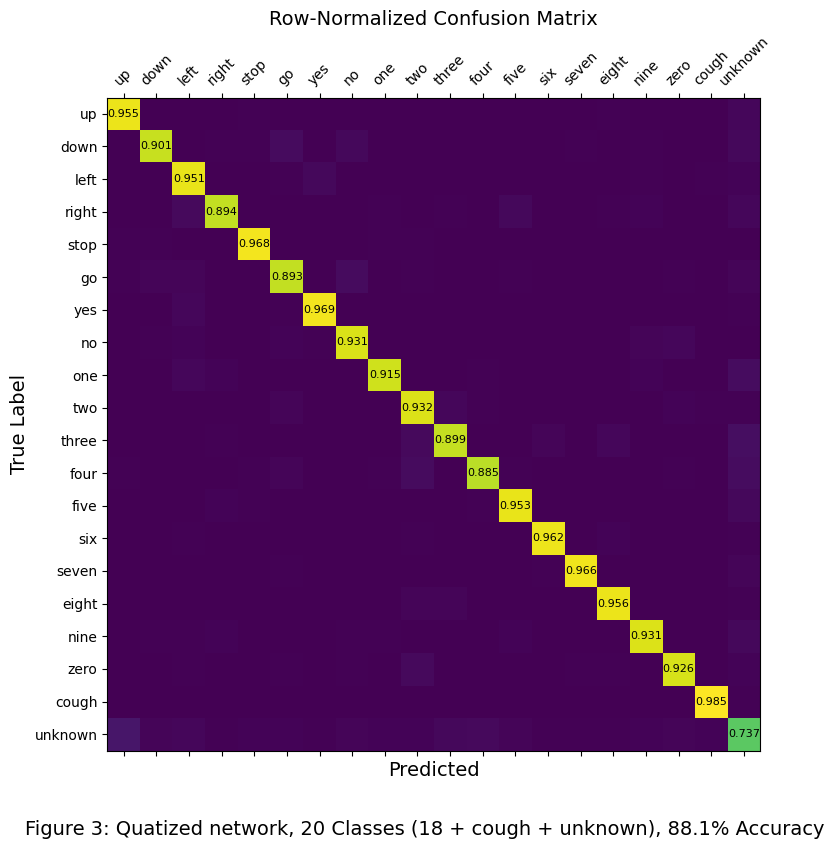

In [29]:
# conv1d then conv2d model
conf_mat_kws_c20_v2 = [
    [406, 1, 0, 1, 3, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 2, 0, 0, 1, 7],
    [1, 366, 0, 2, 3, 11, 0, 8, 1, 0, 0, 0, 1, 0, 2, 0, 2, 0, 1, 8],
    [0, 0, 392, 0, 0, 2, 8, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 0, 2, 4],
    [1, 0, 10, 354, 0, 0, 0, 0, 2, 1, 2, 1, 8, 0, 1, 3, 4, 1, 1, 7],
    [3, 2, 0, 1, 398, 0, 0, 0, 2, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1],
    [2, 6, 5, 0, 1, 359, 1, 12, 0, 3, 1, 1, 2, 0, 1, 0, 0, 2, 0, 6],
    [0, 0, 7, 0, 0, 2, 406, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2],
    [0, 2, 4, 0, 1, 4, 2, 377, 1, 1, 0, 0, 0, 0, 0, 0, 6, 7, 0, 0],
    [0, 0, 7, 4, 0, 0, 1, 0, 365, 0, 1, 2, 1, 0, 0, 0, 4, 1, 0, 13],
    [1, 0, 0, 0, 1, 6, 0, 0, 0, 395, 8, 2, 0, 0, 1, 0, 0, 4, 3, 3],
    [0, 0, 0, 2, 0, 0, 0, 0, 0, 10, 364, 0, 0, 5, 1, 7, 0, 0, 1, 15],
    [2, 0, 1, 0, 3, 6, 0, 0, 3, 12, 1, 354, 2, 0, 0, 0, 0, 2, 1, 13],
    [1, 0, 0, 5, 2, 0, 0, 0, 0, 1, 0, 2, 424, 0, 0, 0, 0, 0, 0, 10],
    [0, 0, 2, 0, 0, 0, 0, 0, 0, 3, 1, 0, 1, 379, 1, 4, 0, 1, 0, 2],
    [0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 3, 392, 0, 0, 1, 0, 6],
    [0, 1, 0, 0, 0, 0, 1, 0, 1, 6, 5, 0, 1, 0, 0, 390, 0, 0, 0, 3],
    [0, 2, 2, 4, 0, 0, 1, 3, 2, 0, 0, 0, 4, 0, 1, 0, 380, 0, 1, 8],
    [1, 0, 3, 0, 0, 2, 0, 2, 0, 10, 1, 0, 0, 1, 3, 3, 0, 387, 1, 4],
    [0, 2, 4, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1403, 7],
    [219, 52, 64, 22, 37, 34, 18, 46, 32, 35, 81, 88, 45, 19, 27, 15, 28, 53, 38, 2669]
]

c20_total = [425, 406, 412, 396, 411, 402, 419, 405, 399, 424, 405, 400, 445, 394, 406, 408, 408, 418, 1424, 3622]
c20_labels = ['up', 'down', 'left', 'right', 'stop', 'go', 'yes', 'no', # 18 + cough + unknown
                  'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'zero',
                  'cough', 'unknown']

# caracterising cough class
c_TP = conf_mat_kws_c20_v2[-2][-2]
c_FN = sum(conf_mat_kws_c20_v2[-2]) - c_TP
c_FP = sum(conf_mat_kws_c20_v2[i][-2] for i in range(len(conf_mat_kws_c20_v2))) - c_TP # sum of column except cough
print('c_FN, c_FP, c_TP: ', c_FN, c_FP, c_TP)
precision_3 = c_TP / (c_TP + c_FP)
recall_3 = c_TP / (c_TP + c_FN)
F1_3 = 2* c_TP / (2 * c_TP + c_FN + c_FP)
accuracy_3 = sum(conf_mat_kws_c20_v2[i][i] for i in range(len(conf_mat_kws_c20_v2))) / sum(c20_total)
print(f"Accuracy for 20-class model: {accuracy_3:.4f}")
print(f"Precision for cough class: {precision_3:.4f}")
print(f"Recall (sensitivity) for cough class: {recall_3:.4f}")
print(f"F1 score for cough class: {F1_3:.4f}")

# plot confusion matrix
plot_conf_mat(conf_mat_kws_c20_v2, c20_labels, c20_total, True, "Row-Normalized Confusion Matrix", "Figure 3: Quatized network, 20 Classes (18 + cough + unknown), 88.1% Accuracy")    
                  

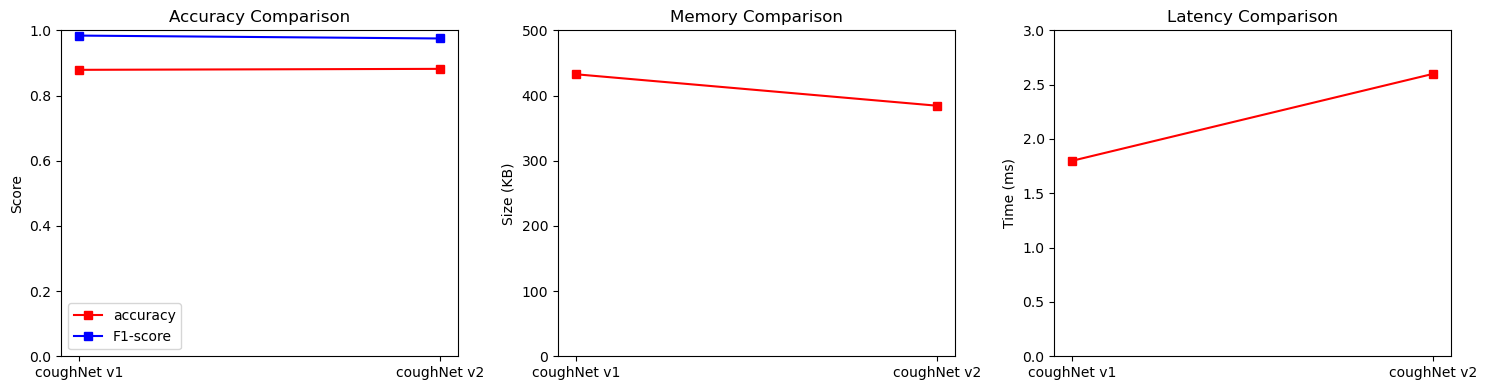

In [30]:
# Coughnet v1 vs v2
metrics = ['coughNet v1', 'coughNet v2']
accuracy = [accuracy_2, accuracy_3]  
#sensitivity = [recall_1, recall_2]
#precision = [precision_1, precision_2]
F1_score = [F1_2, F1_3]
memory = [432.6, 384.4]
latency = [1.8, 2.6] 

fig, axs = plt.subplots(1, 3, figsize=(15, 4))  # 1 row, 3 columns

# Plotting
axs[0].plot(metrics, accuracy, marker='s', label='accuracy', linestyle='-', color='red')
axs[0].plot(metrics, F1_score, marker='s', label='F1-score', linestyle='-', color='blue')
axs[0].set_ylim(0, 1)
axs[0].legend()
axs[0].set_ylabel('Score')
axs[0].set_title('Accuracy Comparison')


axs[1].plot(metrics, memory, marker='s', label='memory (KB)', linestyle='-', color='red')
axs[1].set_ylim(0, 500)
axs[1].set_ylabel('Size (KB)')
axs[1].set_title('Memory Comparison')


axs[2].plot(metrics, latency, marker='s', label='latency (ms)', linestyle='-', color='red')
axs[2].set_ylim(0, 3)
axs[2].set_ylabel('Time (ms)')
axs[2].set_title('Latency Comparison')


plt.tight_layout()

# Show the plot
plt.show()